In [774]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency

df = pd.read_csv("StudentPerformanceFactors.csv")

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [776]:
df.shape

(6607, 20)

In [778]:
df.columns[df.isnull().any()]

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

In [780]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

categorical_cols = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
                    "Internet_Access", "School_Type", "Motivation_Level", "Teacher_Quality",
                    "Family_Income", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level",
                    "Distance_from_Home", "Gender"]

numerical_cols = ["Hours_Studied", "Attendance", "Previous_Scores", "Sleep_Hours", "Tutoring_Sessions",
                  "Physical_Activity", 'Exam_Score']
df_numerical = df[numerical_cols]

df_numerical.corr()['Exam_Score']

/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/298275760.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/298275760.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

Hours_Studied        0.445455
Attendance           0.581072
Previous_Scores      0.175079
Sleep_Hours         -0.017022
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Exam_Score           1.000000
Name: Exam_Score, dtype: float64

In [782]:
from scipy import stats

def remove_outliers(df):
    for col in numerical_cols:
        df = df.copy()
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[(z_scores < 3)]
    return df
df = remove_outliers(df)
df.shape

(6506, 20)

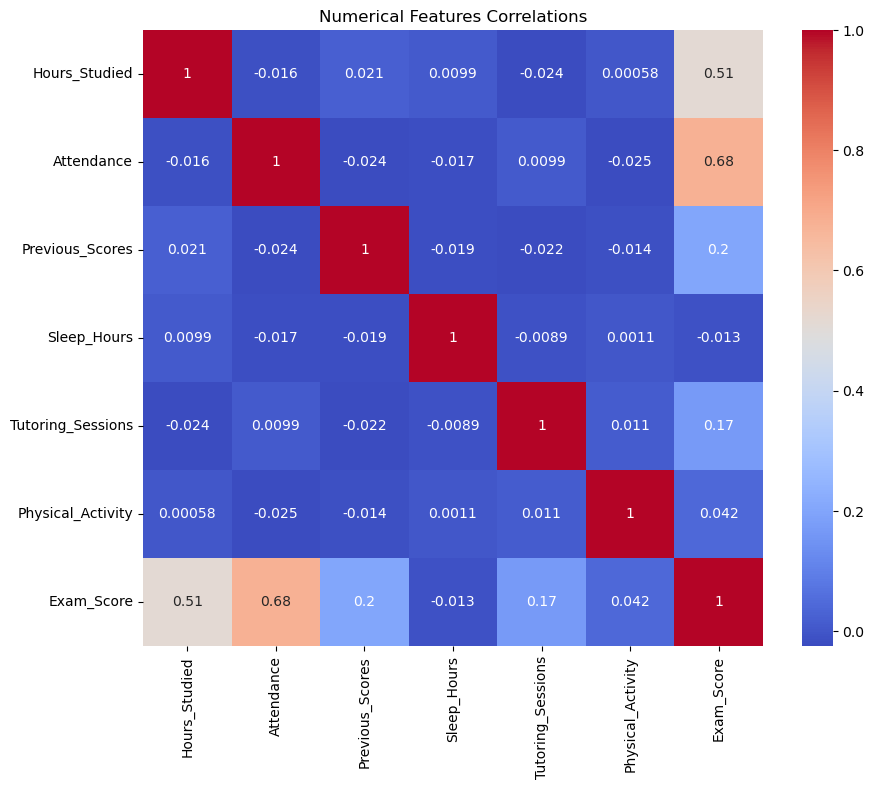

In [784]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Features Correlations')
plt.show()

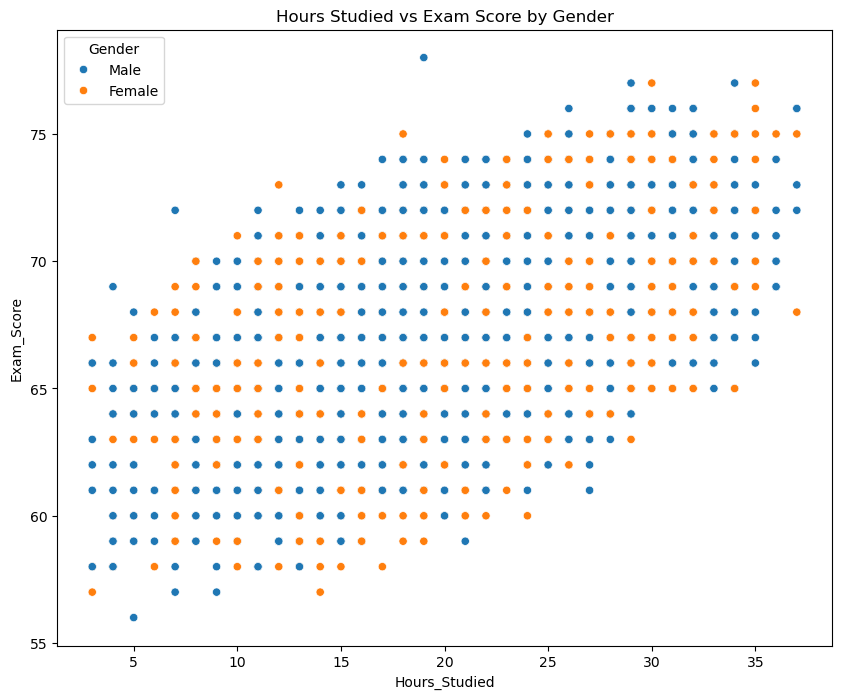

In [786]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=df)
plt.title('Hours Studied vs Exam Score by Gender')
plt.show()

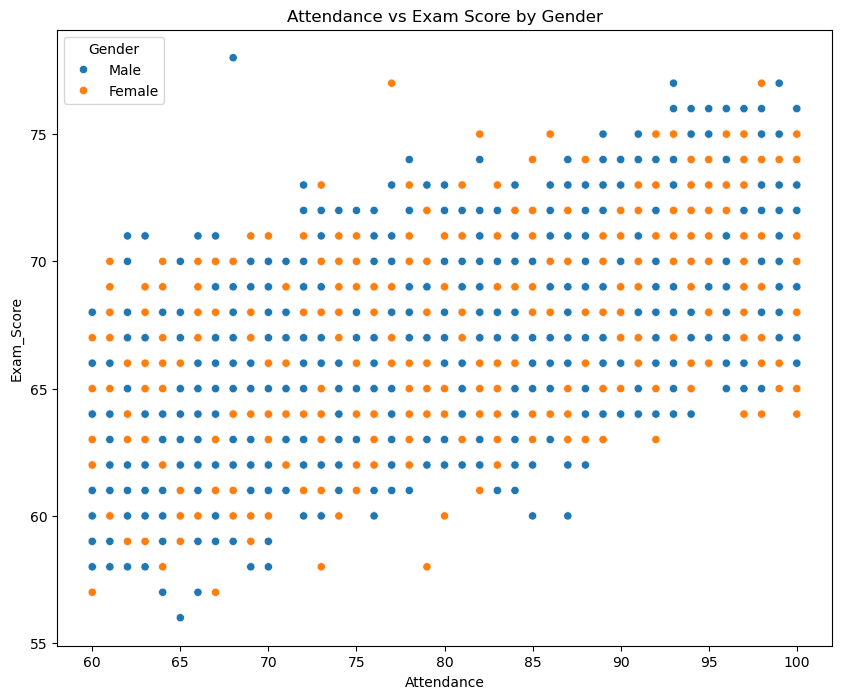

In [788]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Attendance', y='Exam_Score', hue='Gender', data=df)
plt.title('Attendance vs Exam Score by Gender')
plt.show()

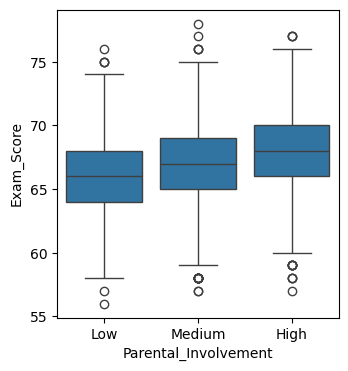

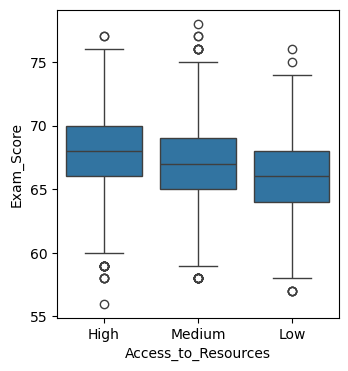

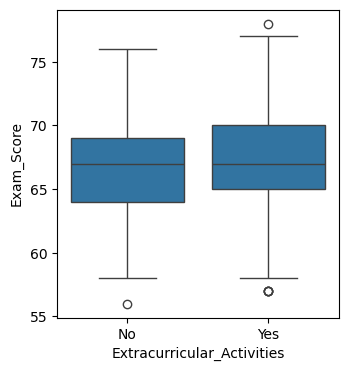

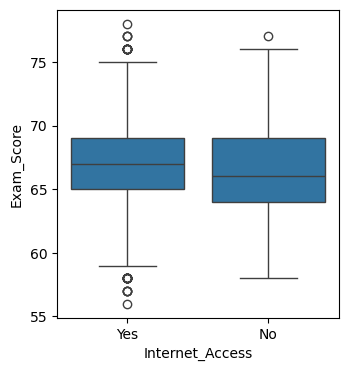

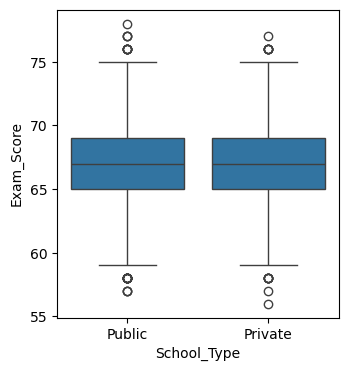

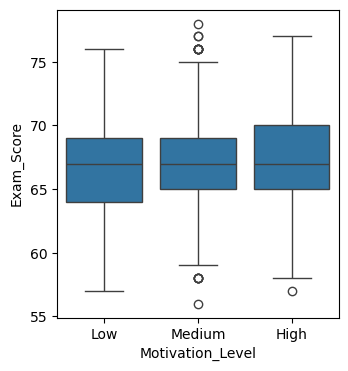

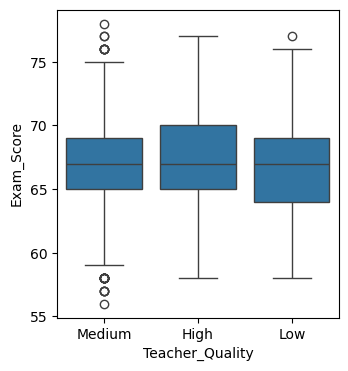

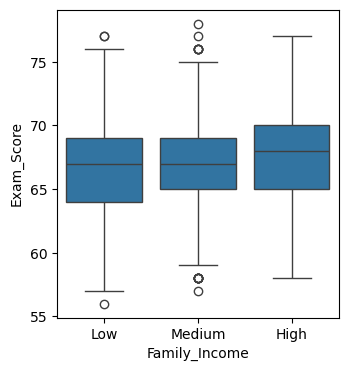

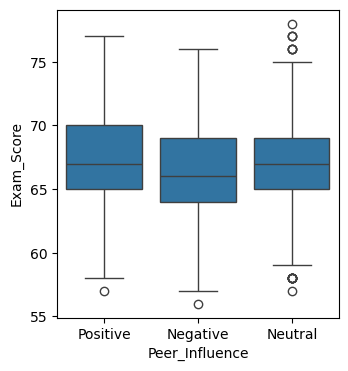

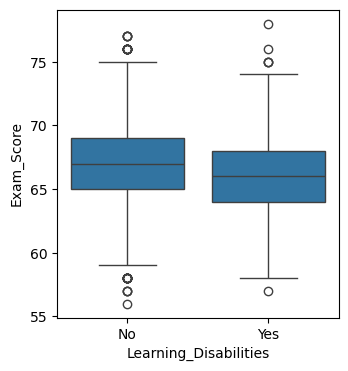

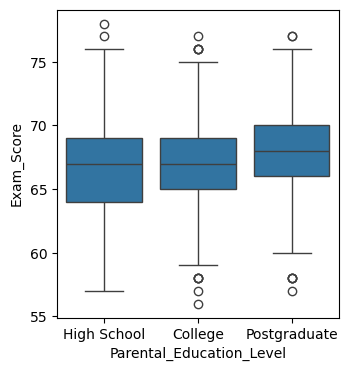

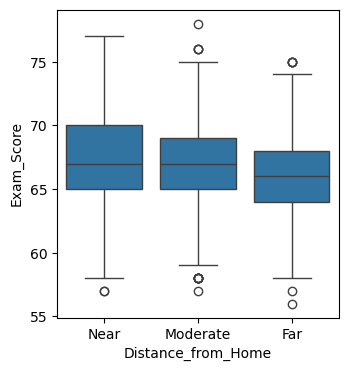

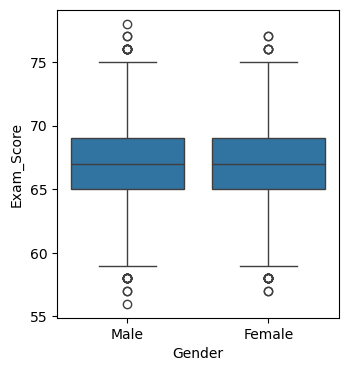

In [790]:
for i in range(len(categorical_cols)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[categorical_cols[i]], y=df['Exam_Score'])
    plt.show()

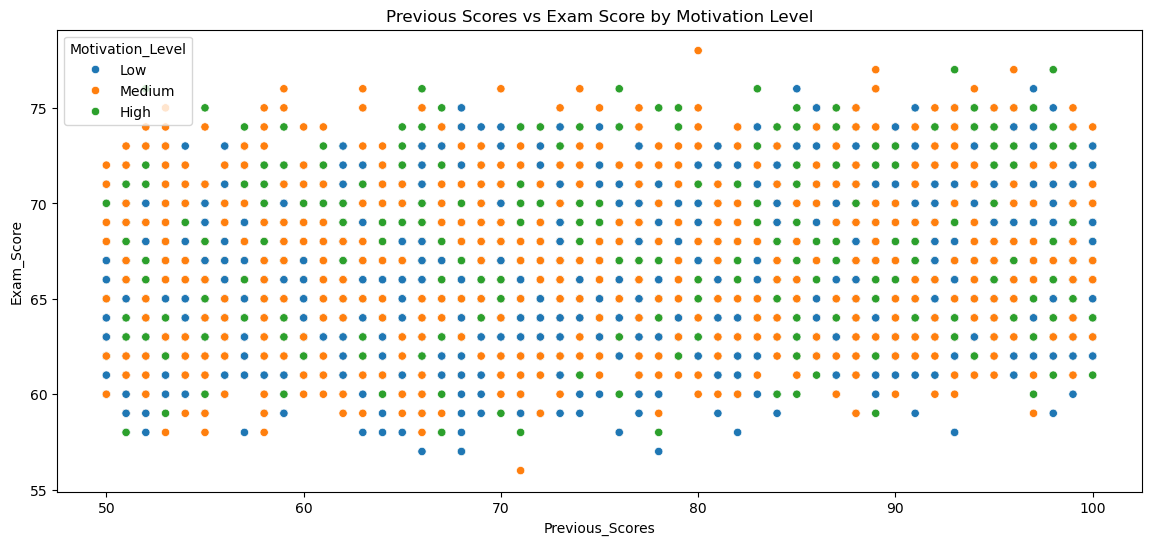

In [791]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', hue='Motivation_Level', data=df)
plt.title('Previous Scores vs Exam Score by Motivation Level')
plt.show()

In [794]:
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        table = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]]) #maybe display contingency tables for correlated categorical later, also could display dof chi other stuff
        chi, p, dof, expected = chi2_contingency(table)
        if (p < 0.05):
            print("Reject the Null Hypothesis: ", categorical_cols[i], " and ", categorical_cols[j], " are not independent.")

Reject the Null Hypothesis:  Parental_Involvement  and  Access_to_Resources  are not independent.
Reject the Null Hypothesis:  Access_to_Resources  and  School_Type  are not independent.
Reject the Null Hypothesis:  Extracurricular_Activities  and  Peer_Influence  are not independent.
Reject the Null Hypothesis:  Motivation_Level  and  Teacher_Quality  are not independent.


In [796]:
pd.crosstab(df['Parental_Involvement'], df['Access_to_Resources'], margins = True)

Access_to_Resources,High,Low,Medium,All
Parental_Involvement,,,,
High,554,406,909,1869
Low,405,228,680,1313
Medium,981,660,1683,3324
All,1940,1294,3272,6506


In [798]:
pd.crosstab(df['Access_to_Resources'], df['School_Type'], margins = True)

School_Type,Private,Public,All
Access_to_Resources,,,
High,632,1308,1940
Low,391,903,1294
Medium,956,2316,3272
All,1979,4527,6506


In [800]:
pd.crosstab(df['Extracurricular_Activities'], df['Peer_Influence'], margins = True)

Peer_Influence,Negative,Neutral,Positive,All
Extracurricular_Activities,,,,
No,527,1085,1013,2625
Yes,824,1470,1587,3881
All,1351,2555,2600,6506


In [802]:
pd.crosstab(df['Motivation_Level'], df['Teacher_Quality'], margins = True)

Teacher_Quality,High,Low,Medium,All
Motivation_Level,,,,
High,395,131,770,1296
Low,572,155,1183,1910
Medium,942,362,1996,3300
All,1909,648,3949,6506


In [804]:
encdf = df.copy()
encategorical_cols = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", 
                    "Teacher_Quality", "Family_Income", "Parental_Education_Level",
                    "Distance_from_Home"]
new_cols = encategorical_cols + numerical_cols
encdf = encdf.replace('Low', 1)
encdf = encdf.replace('Medium', 2)
encdf = encdf.replace('High', 3)
encdf = encdf.replace('High School', 1)
encdf = encdf.replace('College', 2)
encdf = encdf.replace('Postgraduate', 3)
encdf = encdf.replace('Near', 1)
encdf = encdf.replace('Moderate', 2)
encdf = encdf.replace('Far', 3)
encdf_1 = encdf[new_cols]
encdf_1.corr()

/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/2880459972.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/2880459972.py:11: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/2880459972.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

,Parental_Involvement,Access_to_Resources,Motivation_Level,Teacher_Quality,Family_Income,Parental_Education_Level,Distance_from_Home,Hours_Studied,Attendance,Previous_Scores,Sleep_Hours,Tutoring_Sessions,Physical_Activity,Exam_Score
Parental_Involvement,1.000000,-0.026714,-0.022770,0.014201,0.009400,-0.005914,-0.010095,-0.022331,-0.009265,-0.023315,-0.006142,-0.004719,-0.005324,0.180006
Access_to_Resources,-0.026714,1.000000,0.006004,-0.010049,-0.004293,-0.002992,-0.003157,-0.005876,-0.013909,0.025479,-0.016445,-0.012919,-0.009404,0.191907
Motivation_Level,-0.022770,0.006004,1.000000,-0.012599,0.011085,-0.005026,0.002168,-0.011067,-0.004207,0.006385,-0.000371,0.002950,-0.006027,0.098099
Teacher_Quality,0.014201,-0.010049,-0.012599,1.000000,-0.004688,-0.000185,0.008219,-0.003482,-0.003064,-0.005468,0.008590,-0.006158,-0.014745,0.081574
Family_Income,0.009400,-0.004293,0.011085,-0.004688,1.000000,0.000020,-0.009354,-0.000592,-0.013635,-0.012609,-0.016693,0.006683,-0.026303,0.100352
Parental_Education_Level,-0.005914,-0.002992,-0.005026,-0.000185,0.000020,1.000000,0.008490,-0.011912,0.028460,-0.010943,0.008955,0.010489,-0.031451,0.126193
Distance_from_Home,-0.010095,-0.003157,0.002168,0.008219,-0.009354,0.008490,1.000000,0.010835,-0.017339,-0.005767,-0.002613,-0.017743,-0.004199,-0.109888
Hours_Studied,-0.022331,-0.005876,-0.011067,-0.003482,-0.000592,-0.011912,0.010835,1.000000,-0.016097,0.021114,0.009880,-0.023743,0.000585,0.511748
Attendance,-0.009265,-0.013909,-0.004207,-0.003064,-0.013635,0.028460,-0.017339,-0.016097,1.000000,-0.024152,-0.017071,0.009920,-0.024944,0.679236
Previous_Scores,-0.023315,0.025479,0.006385,-0.005468,-0.012609,-0.010943,-0.005767,0.021114,-0.024152,1.000000,-0.019108,-0.021643,-0.013567,0.201126


In [806]:
corrmatrix = encdf_1.corr()
for i in range(len(new_cols)):
    for j in range(i+1, len(new_cols)):
        if (abs(corrmatrix[new_cols[i]][j]) > 0.1 and abs(corrmatrix[new_cols[i]][j]) < 0.3):
             print(new_cols[i], " and ", new_cols[j], " have a small correlation.")
        if (abs(corrmatrix[new_cols[i]][j]) > 0.3 and abs(corrmatrix[new_cols[i]][j]) < 0.5):
             print(new_cols[i], " and ", new_cols[j], " have a medium correlation.")
        if (abs(corrmatrix[new_cols[i]][j]) > 0.5 and abs(corrmatrix[new_cols[i]][j]) < 1):
             print(new_cols[i], " and ", new_cols[j], " have a large correlation.")

Parental_Involvement  and  Exam_Score  have a small correlation.
Access_to_Resources  and  Exam_Score  have a small correlation.
Family_Income  and  Exam_Score  have a small correlation.
Parental_Education_Level  and  Exam_Score  have a small correlation.
Distance_from_Home  and  Exam_Score  have a small correlation.
Hours_Studied  and  Exam_Score  have a large correlation.
Attendance  and  Exam_Score  have a large correlation.
Previous_Scores  and  Exam_Score  have a small correlation.
Tutoring_Sessions  and  Exam_Score  have a small correlation.


/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/3148025586.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/3148025586.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/x4/d9l1qww13z53kp4k_fwt97080000gp/T/ipykernel_28535/3148025586.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [808]:
df2 = df
dummy = pd.get_dummies(df2[categorical_cols],drop_first=True)
df2.drop(columns=categorical_cols,inplace=True)
df2 = pd.concat([df2, dummy],axis=1)
df2.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Family_Income_Low,Family_Income_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,False,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,False,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,False,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [810]:
X = df[numerical_cols].drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(X_train,y_train))
print("test_score: ",lr.score(X_test,y_test))

mean_squared_error:  2.0198332958387115
train_score:  0.8130448957844458
test_score:  0.8112781516265497


In [812]:
X = df2.drop('Exam_Score', axis=1)
y = df2['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(X_train,y_train))
print("test_score: ",lr.score(X_test,y_test))

mean_squared_error:  0.10102701685570124
train_score:  0.9862587043030886
test_score:  0.9905606044835761
